In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#pd.reset_option("all")
above = '../../../'

In [13]:
data = pd.read_pickle(above + 'post_eda.pkl')

In [14]:
# del data['s_bbl']
del data['s_sale_date']
del data['v_longitude']
del data['v_latitude']
# data = data[data['s_total_units']<4]

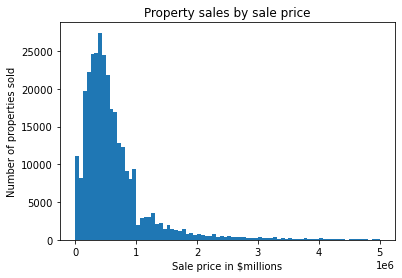

In [15]:
# Sales price histogram
plt.hist(data['s_sale_price'], bins=80, range=(0, np.percentile(data['s_sale_price'],99)))
plt.title('Property sales by sale price')
plt.xlabel('Sale price in $millions')
plt.ylabel('Number of properties sold')
plt.show()

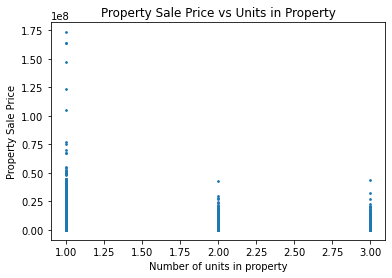

In [17]:
plt.scatter(data['s_total_units'], data['s_sale_price'], s=3)
plt.xlabel('Number of units in property')
plt.ylabel('Property Sale Price')
plt.title('Property Sale Price vs Units in Property')
plt.show()

In [18]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
Y = data.loc[:, data.columns == 's_sale_price']
X = data.loc[:, data.columns != 's_sale_price']
dtr = dtr.fit(X, Y)

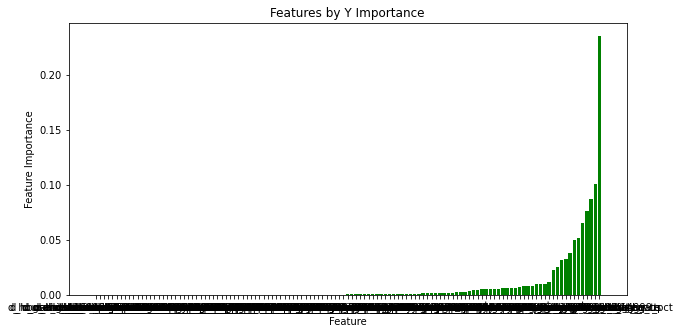

In [19]:
feat_imp = dtr.feature_importances_
X_labels = X.columns
feat_imp_df = pd.DataFrame(zip(X_labels,feat_imp))
sorted_df = feat_imp_df.sort_values(1)
x_pos = np.arange(len(X_labels))
plt.figure(figsize=(10, 5))
plt.bar(x_pos, sorted_df[1],color='green')
plt.xticks(x_pos, sorted_df[0])
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Features by Y Importance')
plt.show()

In [20]:
# Table of feature importances
sorted_df

,0,1
0,s_borough,8.041403e-07
100,d_households_from_15000_to_24999,3.010570e-05
73,d_4_bedroom_units,3.495171e-05
93,d_units_1000000_or_more_pct,5.891994e-05
109,d_households_from_75000_to_99999_pct,5.898281e-05
...,...,...
20,m_sp500_index,6.533198e-02
42,d_high_school_graduate_pct,7.632604e-02
3,s_year_built,8.776759e-02
120,imputed_land_area,1.011622e-01


In [36]:
sorted_df[0].tail(20).to_numpy()

array(['d_pop_25_years_and_over',
       'm_case_shiller_ny_home_price_index_%chg',
       'm_us_real_median_household_income_%chg', 'c_count',
       'm_inflation_rate_%chg', 's_total_units', 'm_sp500_index_%chg',
       'm_real_gross_domestic_product_%chg', 's_building_class_at_sale',
       'm_10yr_treasury_constant_maturity_rate',
       'm_30yr_fixed_rate_mortgage_avg_in_us', 's_zipcode',
       'd_households_from_10000_to_14999_pct', 'v_stories', 'v_nta',
       'm_sp500_index', 'd_high_school_graduate_pct', 's_year_built',
       'imputed_land_area', 'v_fullval'], dtype=object)

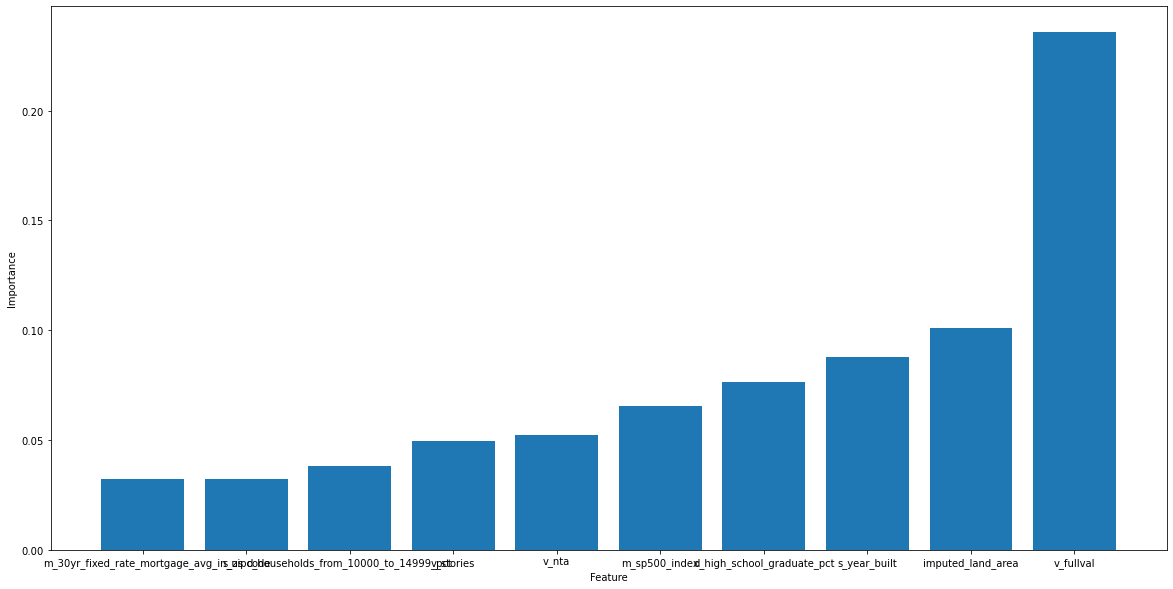

In [21]:
plt.figure(figsize=(20, 10))
plt.bar(sorted_df[-10:][0],sorted_df[-10:][1])
plt.xlabel('Feature')
plt.ylabel('Importance')

plt.show()